In [2]:
%matplotlib notebook
import random as rando
import numpy as np
import matplotlib.pyplot as plt

from matplotlib._png import read_png
from matplotlib.cbook import get_sample_data

# Monopoly Distribution
#### By: Tyler Korte | 09/11/2020

<div>
<img src="https://www.rinovelty.com/images/items/Fullsize/UBMONOP-03.jpg"
     width="190"
     style="float:right; margin-left:10px;">
<p>
    
One day I was curious about if the monopoly board was laid out in a specific way based on the probability of dice rolls. I had a hunch that I'm not the only one that hits boardwalk every time and that it's almost impossible to hit free parking. 
    
I was making homemade pizza that night while I was working on this project and I wanted visuals so I went the easy way and wrote a program that simulated dice rolls and plotted them on a monopoly board instead of calculating seemingly endless probabilities.
</p>
</div>

### Generating Random Dice Rolls

In [3]:
rolls = list()
num_rolls = 150
for _ in range(num_rolls):
    rolls.append(rando.randint(1, 6) + rando.randint(1, 6))

print(rolls)

[6, 9, 5, 9, 8, 12, 11, 5, 8, 5, 9, 7, 5, 8, 2, 8, 3, 7, 8, 6, 6, 12, 4, 9, 5, 11, 5, 9, 11, 4, 4, 10, 4, 9, 6, 7, 6, 5, 4, 5, 6, 7, 5, 10, 10, 5, 11, 10, 5, 6, 8, 6, 12, 5, 6, 3, 7, 6, 11, 11, 6, 8, 10, 7, 6, 10, 10, 9, 9, 4, 8, 6, 10, 10, 4, 9, 4, 6, 9, 8, 8, 3, 12, 10, 6, 2, 9, 10, 7, 8, 10, 10, 7, 8, 9, 7, 12, 3, 7, 4, 6, 10, 4, 5, 8, 4, 9, 11, 10, 12, 7, 6, 4, 11, 3, 5, 9, 4, 8, 9, 5, 10, 10, 10, 8, 9, 7, 5, 6, 10, 8, 12, 8, 3, 7, 7, 10, 2, 7, 12, 6, 5, 5, 4, 8, 5, 9, 11, 11, 5]


Initially, it would seem easy to create a random number in the range \[1,12\], but this is not representative of the reality of rolling two 6-sided dice. To get a more representative random dice roll, it is important to generate two rolls in the range \[1, 6\] and add them. In this project I was not interested in taking into account doubles because this effectively simulates a single person's movement around the board, regardless of which turn the movements happen.

In [31]:
roll_sums = dict()
for n in range(2, 13):
    roll_sums[n] = 0
for i in range(1, 7):
    for j in range(1, 7):
        roll_sums[i+j] += 1
for index in sorted(roll_sums.keys()):
    print('%2d' % index, '*'*roll_sums[index], '      ', '%2d' % index, ' is achieved ', roll_sums[index], 'ways')

 2 *         2  is achieved  1 ways
 3 **         3  is achieved  2 ways
 4 ***         4  is achieved  3 ways
 5 ****         5  is achieved  4 ways
 6 *****         6  is achieved  5 ways
 7 ******         7  is achieved  6 ways
 8 *****         8  is achieved  5 ways
 9 ****         9  is achieved  4 ways
10 ***        10  is achieved  3 ways
11 **        11  is achieved  2 ways
12 *        12  is achieved  1 ways


In case you did not already know, there is a roughly normal distribution of outcomes centered at 7 when rolling two 6-sided dice. 

"Rolling dice is a discrete distribution, while the normal distribution, AKA the Gaussian distribution, is continuous by definition. The distribution is technically binomial, which approximates the normal distribution as n gets large."
<p><a href="https://mathworld.wolfram.com/Dice.html#:~:text=For%20three%20six%2Dsided%20dice,both%20with%20probability%201%2F216.&text=%2C%202%2C%203%2C%20and%204,number%20of%20dice%20is%20increased.">More information from Wolfram</a></p>

### Setting Up the Board

In [3]:
boardFile = open('board.txt', 'r')
board = dict()
for i, line in enumerate(boardFile.readlines()):
    board[i] = line.strip()

Here I created a dictionary of the positionsaround the board relative to 'Go' and the property at that position.

### Tallying Up the Results

In [33]:
# for roll in rolls we want to tally the position
# position is 0 for go to 39 for boardwalk
position = 0
tallys = dict()
for roll in rolls:
    position = np.mod(position + roll, 40)
    if position in tallys.keys():
        tallys[position] += 1
    else:
        tallys[position] = 1
#     print(f'roll: {roll} new position: {position} {board[position]}')
# print(tallys)

Here I tallied up the number of times each position was hit with the given rolls. I did this by keeping track of the position and adding the next roll, mod 40. The logic was only necessary for populating the dictionary from empty.

### Plotting the Results

<IPython.core.display.Javascript object>


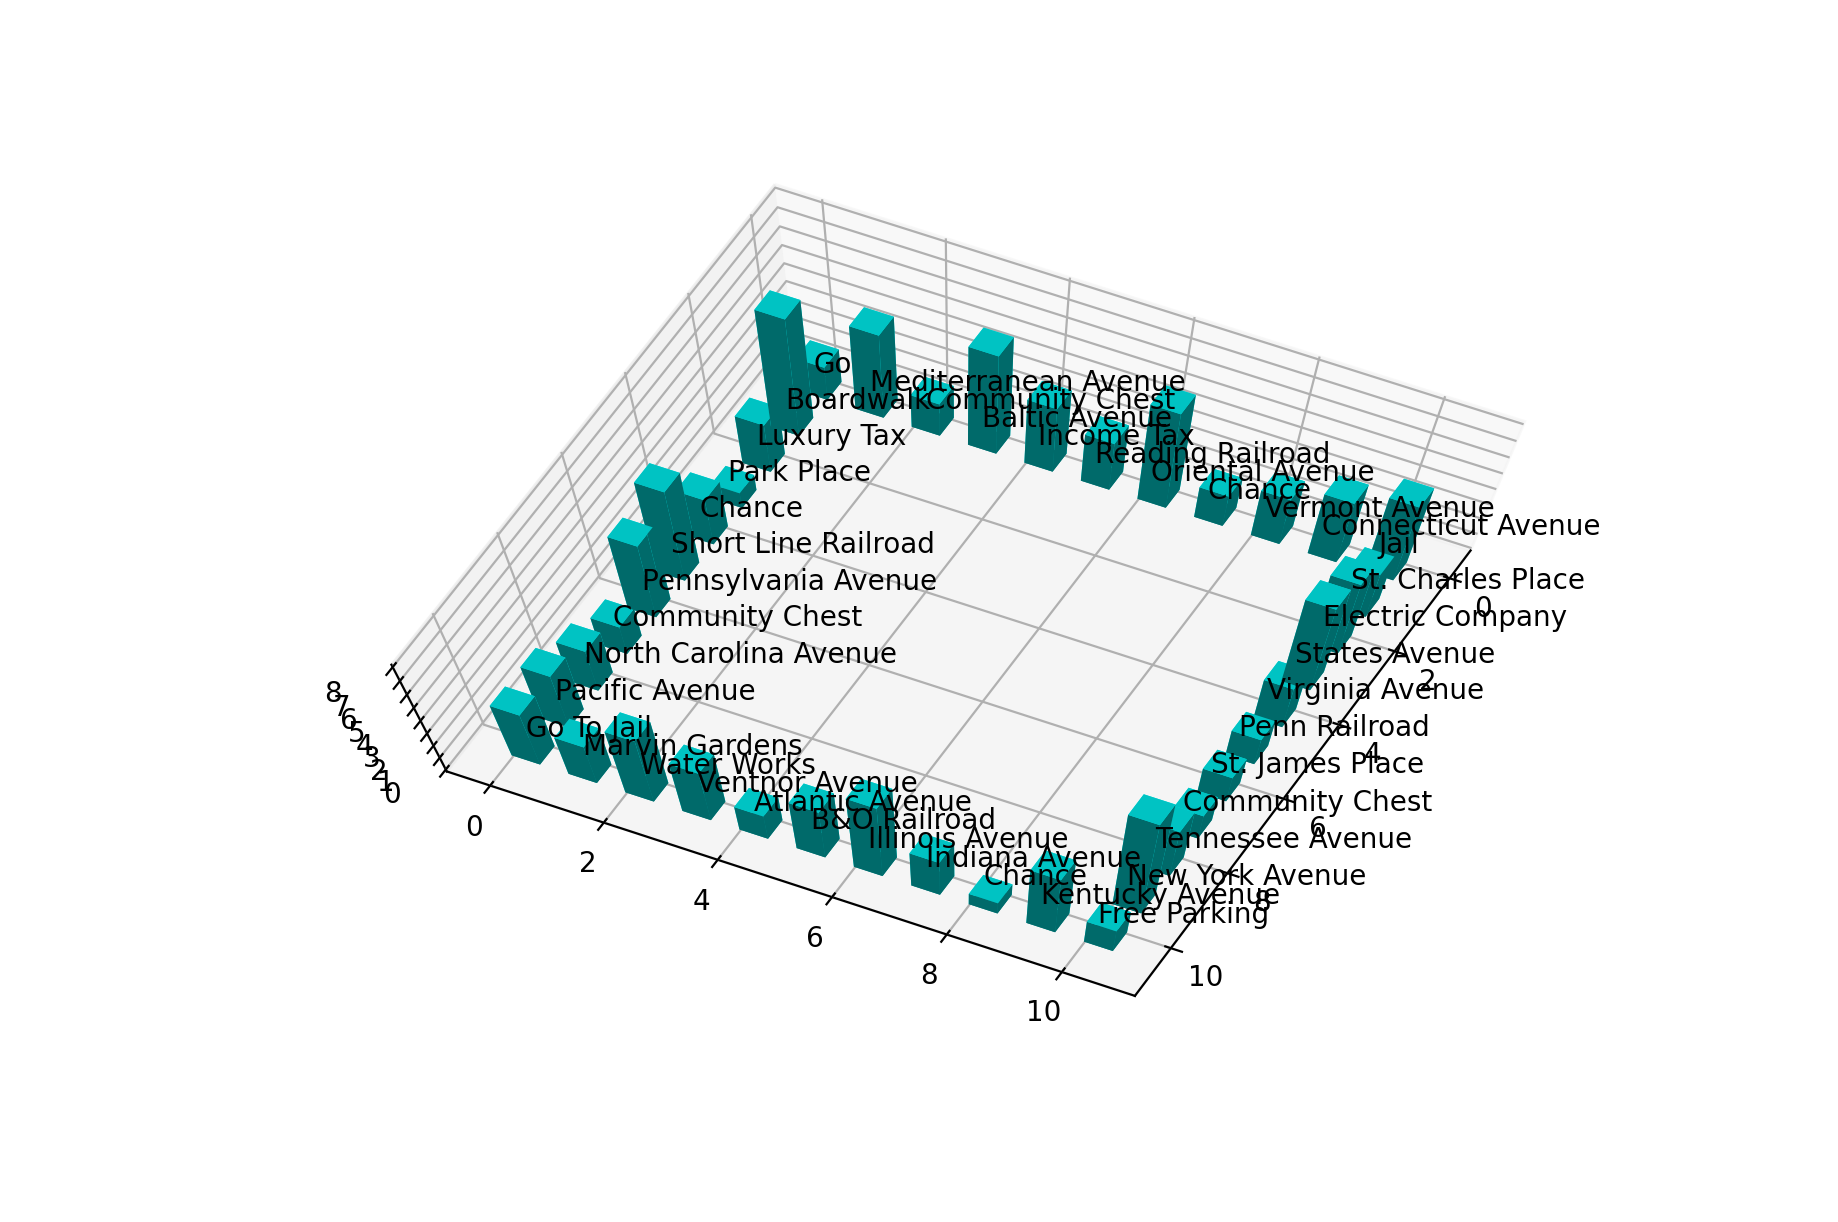

In [45]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')

num_bars = 40
x_pos = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
y_pos = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
z_pos = [0] * num_bars
x_size = [0.5] * num_bars
y_size = [0.5] * num_bars
z_size = [0] * num_bars
for x in range(num_bars):
    if x in tallys.keys():
        z_size[x] = tallys[x]

for prop, x, y, z in zip(board.values(), x_pos, y_pos, z_pos):
    label = prop  # '(%d, %d, %d)' % (x, y, z)
    ax1.text(x, y, z, label)
    

ax1.set_zlim(0, 8)
ax1.view_init(50, 25)
    
ax1.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='aqua')
plt.show()

I initially wanted to have the 3D bar chart overlay a picture of the monopoly board for legibility, but I could not figure out how to do this so I added labels. This was obviously very difficult to read.

Eventually I accepted my fate and learned enough about matplotlib to make it work. After an undisclosed number of hours hitting my head against my keyboard, I was able to get the results I wanted by plotting the image as a surface that reads in its shading/coloring from a raw .png file. There must be a better way to do this because it takes forever to load, but it was good enough for this purpose.

### Desired Visualization

<IPython.core.display.Javascript object>


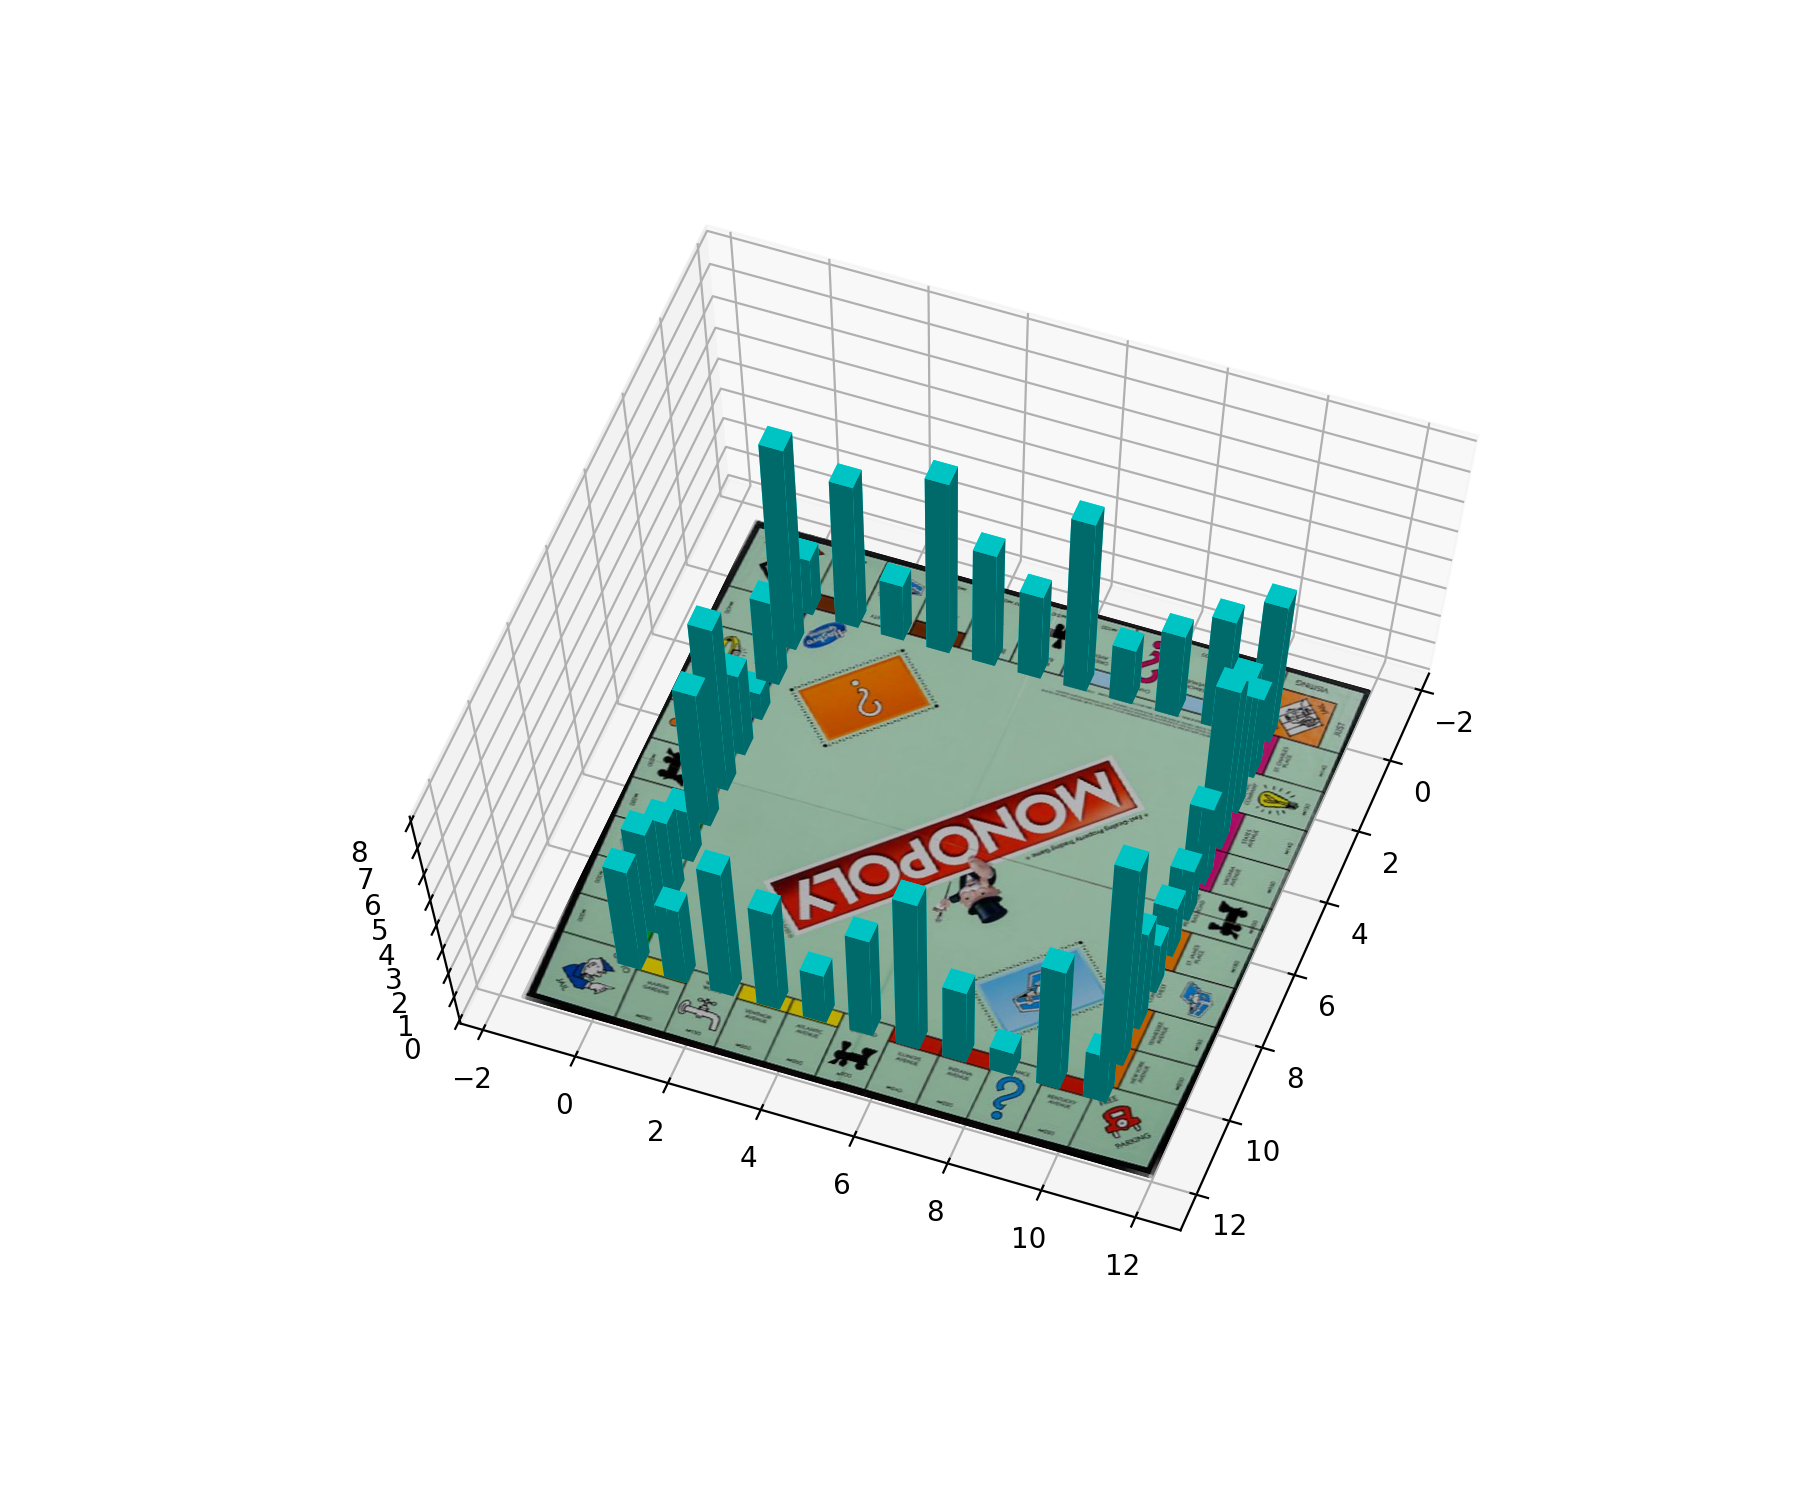

In [48]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')

fn = get_sample_data("/Users/tylerkorte/PycharmProjects/Monopoly/classic-monopoly.png", asfileobj=True)
arr = read_png(fn)

x0 = -1.5  # -2.1
xf = 12  # 12.35
dx = (xf - x0)/550
x = np.arange(x0, xf, dx)
y = np.arange(x0, xf, dx)
xx, yy = np.meshgrid(x, y)
ax2.set_zlim(0, 8)
ax2.view_init(80, 20)

ax2.plot_surface(xx, yy, np.atleast_2d(0), rstride=1, cstride=1, facecolors=arr)
ax2.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='aqua')

plt.show()

With the visualization finally in place, and a bit of patience, it was convenient to see how much each property was hit by moving the 3D graph around. I saved this in a static state that shows the general idea. Adjusting the parameters for this took a while, but the results are pretty cool to see. 

### Raw Output

In [41]:
for pos in board:
    print('%22s' % board[pos], ' was hit ', '%2d' % tallys[pos], ' times')

                    Go  was hit   2  times
  Mediterranean Avenue  was hit   5  times
       Community Chest  was hit   2  times
         Baltic Avenue  was hit   6  times
            Income Tax  was hit   4  times
      Reading Railroad  was hit   3  times
       Oriental Avenue  was hit   6  times
                Chance  was hit   2  times
        Vermont Avenue  was hit   3  times
    Connecticut Avenue  was hit   4  times
                  Jail  was hit   5  times
     St. Charles Place  was hit   3  times
      Electric Company  was hit   5  times
         States Avenue  was hit   6  times
       Virginia Avenue  was hit   3  times
         Penn Railroad  was hit   2  times
       St. James Place  was hit   2  times
       Community Chest  was hit   2  times
      Tennessee Avenue  was hit   4  times
       New York Avenue  was hit   8  times
          Free Parking  was hit   2  times
       Kentucky Avenue  was hit   5  times
                Chance  was hit   1  times
        Ind

### Results and Takeaways

This was far from scientific, but it seems like my hunch might have been correct. Boardwalk was consistently hit with the second most freqency and free parking was hit with the second least frequency. 

If I were to revisit this project, I would add in the chance and community chest factor by creating separate lists of the cards and randomly drawing from them to see how they affect the gameplay. I could also run hundreds of tests with the raw data to be more scientific, but that was not the point of this exercise.

<p>Author: <a href="https://tylerkorte.com">Tyler Korte</a></p>